In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('rainfall.csv')

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.shape

(8425, 23)

In [5]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.4      1
 26.6     1
 26.9     1
 0.3      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64

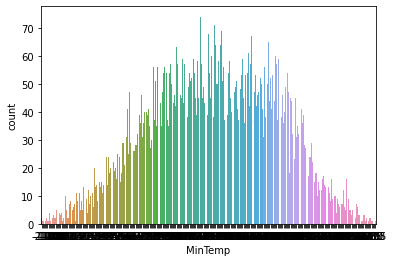

In [6]:
sns.countplot(x=data['MinTemp'])
data['MinTemp'].value_counts()

0.0     5299
0.2      406
0.4      177
0.6      116
1.2       86
        ... 
59.0       1
29.2       1
58.0       1
51.0       1
99.2       1
Name: Rainfall, Length: 250, dtype: int64

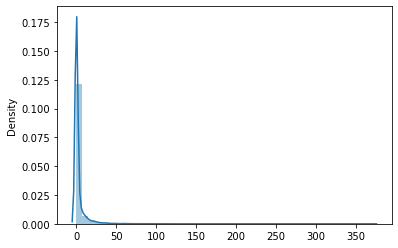

In [7]:
sns.distplot(x=data['Rainfall'])
data['Rainfall'].value_counts()

4.0     180
3.0     163
2.4     147
2.2     146
2.6     143
       ... 
0.7       1
15.6      1
19.2      1
15.0      1
22.4      1
Name: Evaporation, Length: 116, dtype: int64

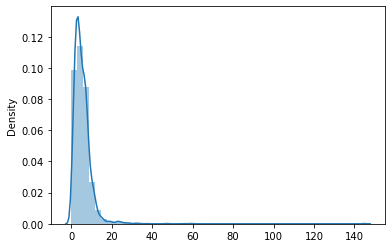

In [8]:
sns.distplot(x=data['Evaporation'])
data['Evaporation'].value_counts()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

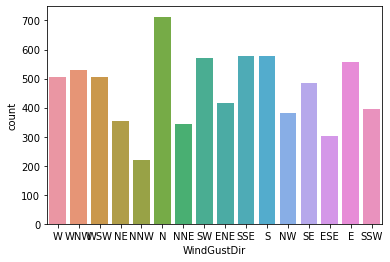

In [10]:
sns.countplot(x=data['WindGustDir'])
data['WindGustDir'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

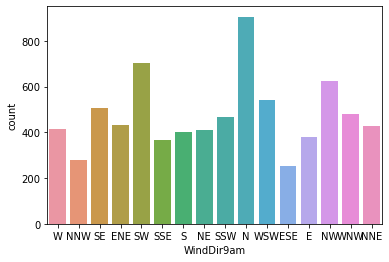

In [11]:
sns.countplot(x=data['WindDir9am'])
data['WindDir9am'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
ESE    462
W      462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

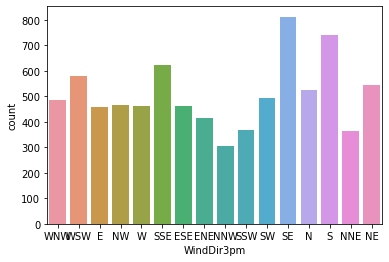

In [12]:
sns.countplot(x=data['WindDir3pm'])
data['WindDir3pm'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

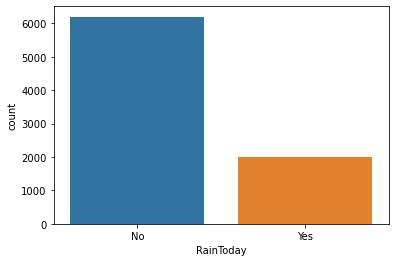

In [13]:
sns.countplot(x=data['RainToday'])
data['RainToday'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

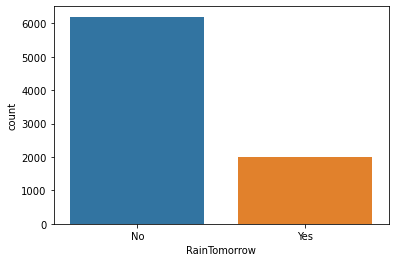

In [14]:
sns.countplot(x=data['RainTomorrow'])
data['RainTomorrow'].value_counts()

In [15]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

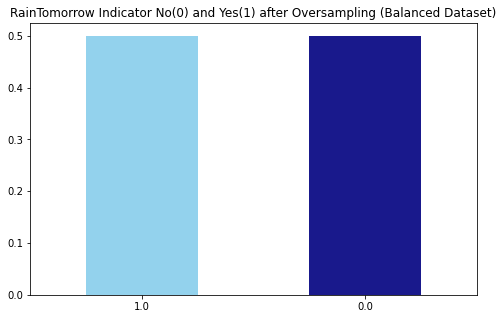

In [16]:
from sklearn.utils import resample

no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [17]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,5886,0.475061
Evaporation,5186,0.418563
Cloud9am,3202,0.258434
Cloud3pm,3197,0.258031


In [18]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [19]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [20]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lec = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lec[col] = LabelEncoder()
    oversampled[col] = lec[col].fit_transform(oversampled[col])

In [21]:
oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,697,5,13.9,28.4,0.0,7.0,9.6,3,61.0,3,...,52.0,33.0,1013.3,1008.7,3.0,5.0,20.9,27.0,0.0,1.0
6217,848,2,19.2,26.6,6.0,3.2,0.9,0,28.0,11,...,75.0,52.0,1022.3,1019.7,7.0,8.0,24.2,25.5,1.0,1.0
4725,513,5,8.8,18.1,0.8,0.8,4.4,7,56.0,3,...,60.0,56.0,1018.8,1015.3,7.0,7.0,12.9,18.1,0.0,1.0
4936,724,5,19.6,23.5,23.0,10.0,0.3,3,35.0,3,...,89.0,76.0,1016.0,1016.6,7.0,8.0,19.8,19.9,1.0,1.0


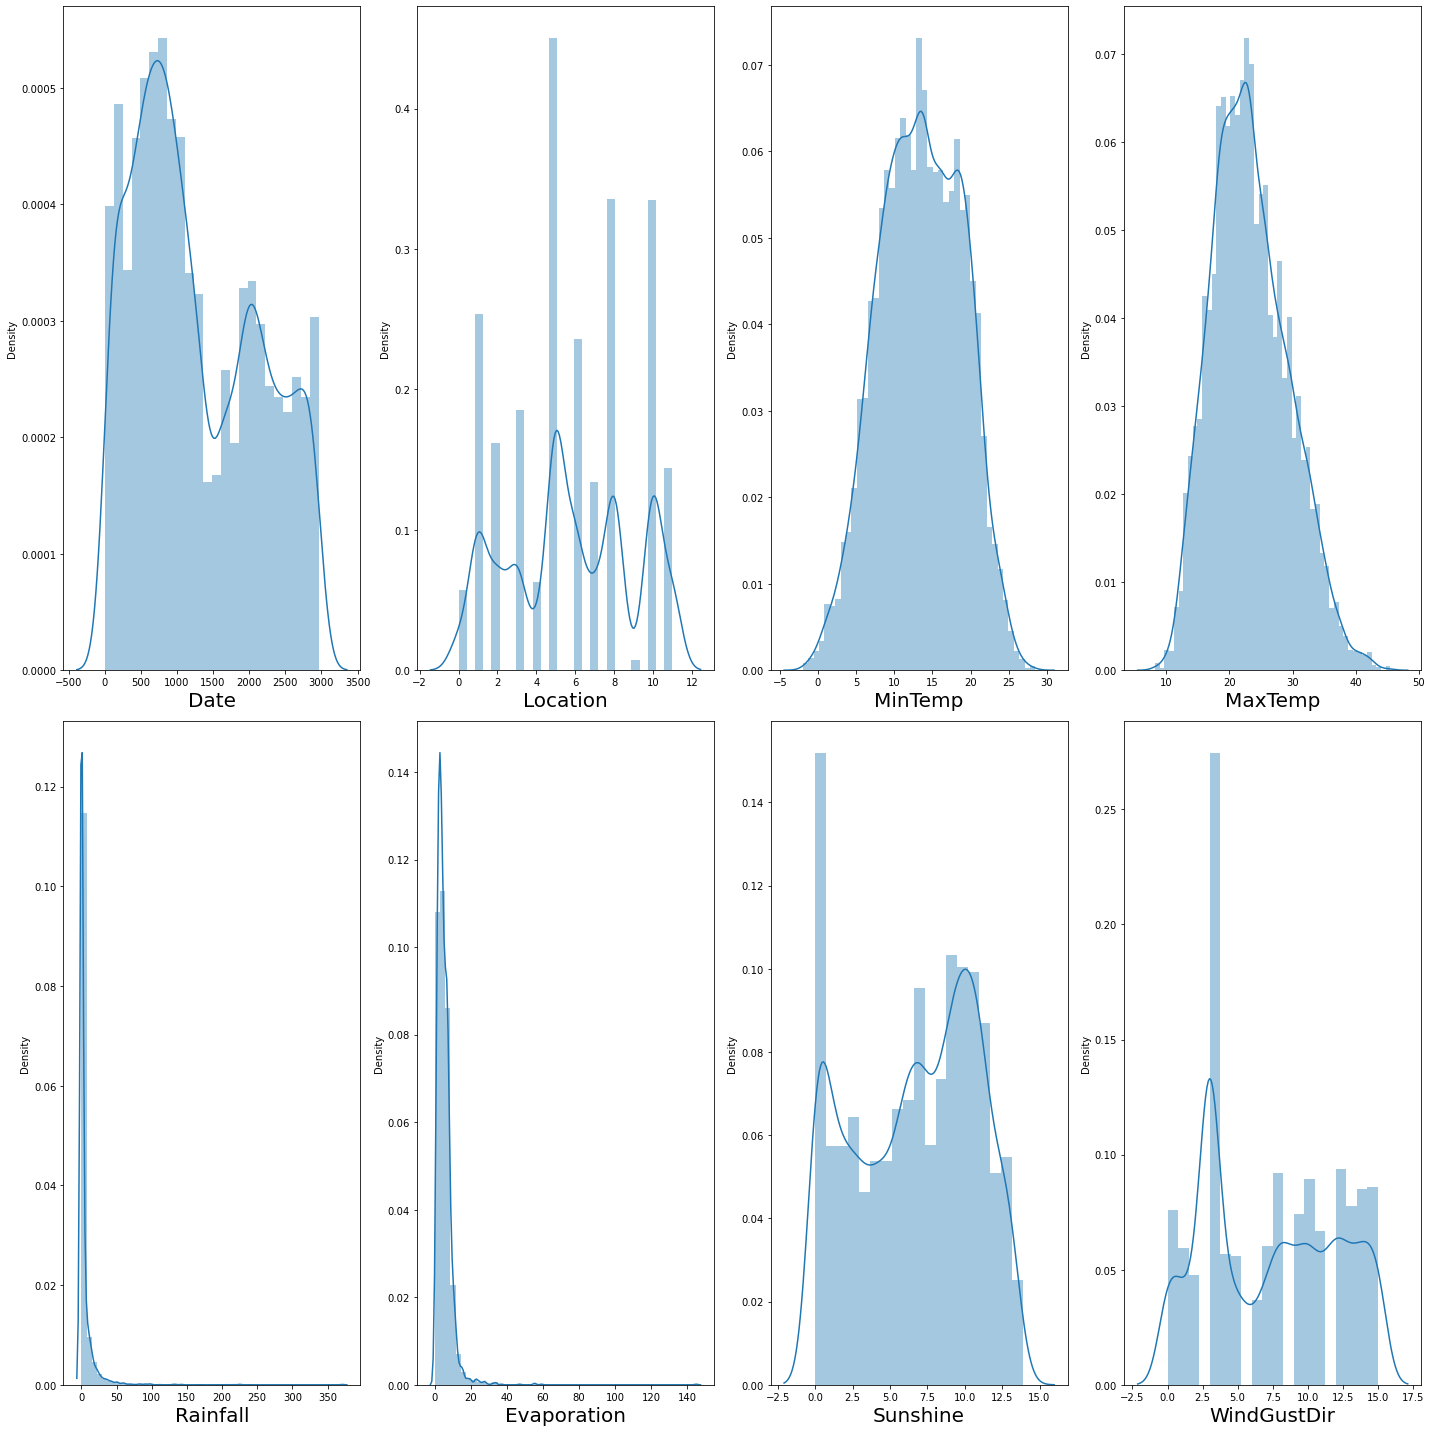

In [22]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in oversampled:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(oversampled[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
oversampled.isnull().sum()

Date                0
Location            0
MinTemp           106
MaxTemp            54
Rainfall          262
Evaporation      5186
Sunshine         5886
WindGustDir         0
WindGustSpeed    1435
WindDir9am          0
WindDir3pm          0
WindSpeed9am      107
WindSpeed3pm      122
Humidity9am        84
Humidity3pm       123
Pressure9am      1944
Pressure3pm      1948
Cloud9am         3202
Cloud3pm         3197
Temp9am            77
Temp3pm           111
RainToday         262
RainTomorrow        0
dtype: int64

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data = oversampled.copy(deep=True) 
mi = IterativeImputer()
data.iloc[:, :] = mi.fit_transform(oversampled)

In [25]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [26]:
data.skew()

Date              0.390583
Location         -0.035489
MinTemp          -0.087554
MaxTemp           0.414875
Rainfall         12.011140
Evaporation       8.228950
Sunshine          0.027561
WindGustDir       0.111881
WindGustSpeed     0.692354
WindDir9am        0.163090
WindDir3pm       -0.119690
WindSpeed9am      0.915295
WindSpeed3pm      0.460172
Humidity9am      -0.398715
Humidity3pm      -0.020688
Pressure9am      -0.134760
Pressure3pm      -0.102949
Cloud9am         -0.425498
Cloud3pm         -0.408670
Temp9am           0.019318
Temp3pm           0.434479
RainToday         0.737573
RainTomorrow      0.000000
dtype: float64

In [27]:
data.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,...,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.000000,12390.00000
mean,1278.067635,5.785553,13.481113,23.302971,4.245640,5.003197,6.415610,7.334383,40.844090,7.372478,...,70.472676,56.177661,1017.201602,1014.839504,4.908291,4.965113,17.706282,21.749792,0.326862,0.50000
std,850.226028,3.170909,5.357565,6.029183,14.081126,4.186829,3.857257,4.677195,15.379173,4.555113,...,16.640297,19.456909,6.521559,6.420080,2.613887,2.477965,5.517438,5.905820,0.464571,0.50002
min,0.000000,0.000000,-2.000000,8.200000,-9.646820,-5.234925,-1.719538,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,-0.923054,-1.691556,1.900000,7.300000,-0.390459,0.00000
25%,578.000000,3.000000,9.500000,18.900000,0.000000,2.600000,3.192381,3.000000,30.000000,3.000000,...,59.000000,42.876459,1013.100000,1010.600000,2.931341,3.000000,13.700000,17.425000,0.000000,0.00000
50%,1072.000000,6.000000,13.500000,22.700000,0.000000,4.600000,6.503268,7.000000,39.000000,7.000000,...,71.000000,56.000000,1017.513802,1015.251417,5.509364,5.310330,17.612892,21.200000,0.000000,0.50000
75%,2009.750000,8.000000,17.800000,27.300000,3.200000,6.838617,9.536381,12.000000,50.000000,12.000000,...,83.000000,70.000000,1021.300000,1018.600000,7.000000,7.000000,21.700000,25.500000,1.000000,1.00000
max,2965.000000,11.000000,28.500000,45.500000,371.000000,145.000000,18.201000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,9.766596,9.516916,39.400000,44.100000,1.000000,1.00000


In [28]:
# Detecting outliers with IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1431.750000
Location            5.000000
MinTemp             8.300000
MaxTemp             8.400000
Rainfall            3.200000
Evaporation         4.238617
Sunshine            6.344000
WindGustDir         9.000000
WindGustSpeed      20.000000
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       13.000000
WindSpeed3pm       15.000000
Humidity9am        24.000000
Humidity3pm        27.123541
Pressure9am         8.200000
Pressure3pm         8.000000
Cloud9am            4.068659
Cloud3pm            4.000000
Temp9am             8.000000
Temp3pm             8.075000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [29]:
# Removing outliers from the dataset
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(9748, 23)

In [30]:
data.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.447347,-0.017607,0.095876,-0.017816,0.353656,0.031842,-0.090380,-0.107465,-0.050353,...,0.110144,-0.044608,0.106228,0.068632,0.006042,-0.024863,0.046338,0.107038,-0.028732,0.003975
Location,0.447347,1.000000,0.086298,0.052866,-0.014636,0.344955,-0.037916,0.010868,0.194836,-0.039300,...,0.013574,0.049078,0.005213,0.018818,0.058687,0.056062,0.093962,0.053500,-0.028285,-0.000793
MinTemp,-0.017607,0.086298,1.000000,0.727720,0.048636,0.600335,0.057027,-0.149179,0.194895,-0.032015,...,-0.109706,0.114650,-0.451421,-0.426035,0.127378,0.070006,0.896272,0.691138,0.042755,0.103547
MaxTemp,0.095876,0.052866,0.727720,1.000000,-0.197702,0.667384,0.540311,-0.222053,0.101467,-0.189208,...,-0.348447,-0.374762,-0.317004,-0.394852,-0.314995,-0.326411,0.865238,0.973823,-0.219244,-0.154536
Rainfall,-0.017816,-0.014636,0.048636,-0.197702,1.000000,-0.146841,-0.286365,0.094101,0.071533,0.104762,...,0.325547,0.285163,-0.108532,-0.033123,0.275776,0.246422,-0.095335,-0.204418,0.834818,0.265120
Evaporation,0.353656,0.344955,0.600335,0.667384,-0.146841,1.000000,0.386708,-0.090138,0.273739,0.040048,...,-0.446342,-0.276963,-0.277692,-0.271539,-0.152843,-0.210591,0.680288,0.641172,-0.167950,-0.130818
Sunshine,0.031842,-0.037916,0.057027,0.540311,-0.286365,0.386708,1.000000,-0.058436,0.024673,-0.016800,...,-0.532539,-0.719721,0.001162,-0.060235,-0.773888,-0.797898,0.305362,0.570241,-0.289963,-0.495143
WindGustDir,-0.090380,0.010868,-0.149179,-0.222053,0.094101,-0.090138,-0.058436,1.000000,0.135712,0.376973,...,0.003538,0.034926,-0.136261,-0.028044,0.099556,0.087227,-0.173222,-0.236118,0.103700,0.035304
WindGustSpeed,-0.107465,0.194836,0.194895,0.101467,0.071533,0.273739,0.024673,0.135712,1.000000,-0.007279,...,-0.298856,-0.091030,-0.389631,-0.332987,0.033943,0.116137,0.161104,0.054780,0.075127,0.192088
WindDir9am,-0.050353,-0.039300,-0.032015,-0.189208,0.104762,0.040048,-0.016800,0.376973,-0.007279,1.000000,...,-0.030058,0.080534,0.008268,0.117312,0.072129,0.057813,-0.075527,-0.196179,0.114204,0.018597


<AxesSubplot:>

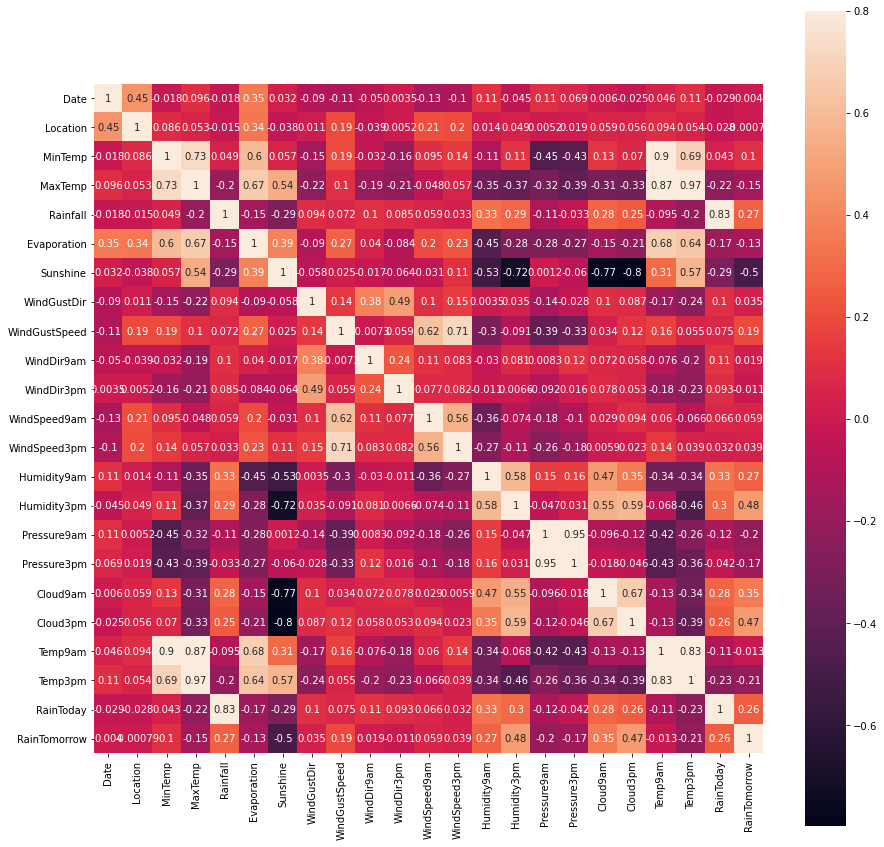

In [31]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),vmax=.8,square=True,annot = True)

In [32]:
X=data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
y=data['RainTomorrow']

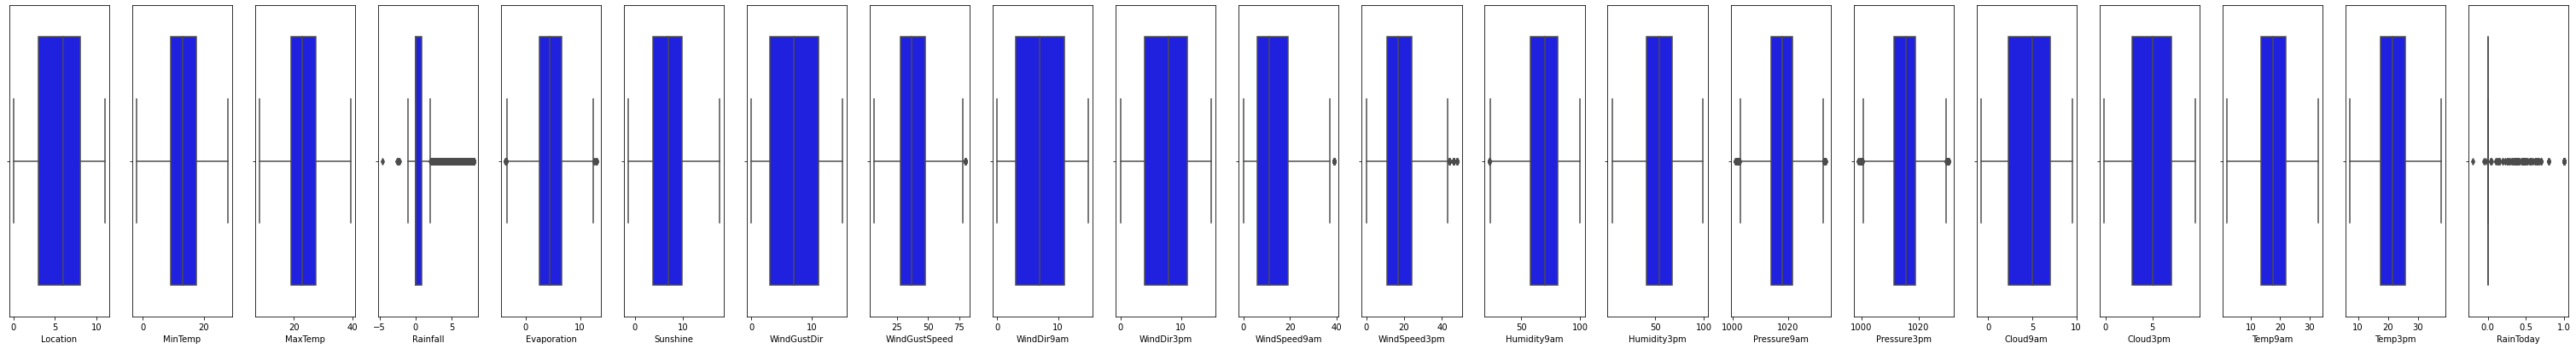

In [33]:
import matplotlib.pyplot as plt
collist=X.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
X

array([[-1.48923394,  0.04530976, -0.08952002, ..., -0.12837675,
        -0.01657137, -0.53545772],
       [-1.48923394, -1.06211197,  0.28810493, ..., -0.07412313,
         0.42237208, -0.53545772],
       [-1.48923394, -0.04697538,  0.39109356, ...,  0.61308949,
         0.22923696, -0.53545772],
       ...,
       [-1.17283421,  1.11581744,  0.54557649, ...,  1.19179485,
         0.63306494,  1.91355345],
       [-0.22363502, -0.80371356, -0.91342901, ..., -0.85175846,
        -0.66620769, -0.53545772],
       [-1.80563367, -1.09902603, -1.737338  , ..., -1.64747833,
        -1.63188329,  1.91355345]])

In [36]:
X.shape

(9748, 21)

In [37]:
y.shape

(9748,)

In [38]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
749     1.0
5720    1.0
6217    1.0
4725    1.0
6765    1.0
Name: RainTomorrow, Length: 9748, dtype: float64

## Here we can see that outcome has only two value 0 and 1 so we have to use classification model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [40]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gn=GaussianNB()
svc=SVC()

In [41]:
for i in range(0,1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.7801942278758036
At random state 0,the testing accuracy is:-0.7800574476815757


At random state 1,the training accuracy is:-0.780878128846943
At random state 1,the testing accuracy is:-0.7911366434140337


At random state 2,the training accuracy is:-0.7814252496238545
At random state 2,the testing accuracy is:-0.7919573245794009


At random state 3,the training accuracy is:-0.7858022158391464
At random state 3,the testing accuracy is:-0.7685679113664341


At random state 4,the training accuracy is:-0.7815620298180823
At random state 4,the testing accuracy is:-0.7829298317603611


At random state 5,the training accuracy is:-0.7777321843797018
At random state 5,the testing accuracy is:-0.7944193680755026


At random state 6,the training accuracy is:-0.7782793051566134
At random state 6,the testing accuracy is:-0.8071399261386951


At random state 7,the training accuracy is:-0.7871700177814253
At random state 7,the testing accuracy is:-0.7833

At random state 66,the training accuracy is:-0.7816988100123102
At random state 66,the testing accuracy is:-0.7862125564218301


At random state 67,the training accuracy is:-0.7856654356449186
At random state 67,the testing accuracy is:-0.774312679524005


At random state 68,the training accuracy is:-0.7847079742853235
At random state 68,the testing accuracy is:-0.7886745999179319


At random state 69,the training accuracy is:-0.7900424018602107
At random state 69,the testing accuracy is:-0.7714402954452195


At random state 70,the training accuracy is:-0.786349336616058
At random state 70,the testing accuracy is:-0.7788264259335248


At random state 71,the training accuracy is:-0.7866228970045137
At random state 71,the testing accuracy is:-0.7739023389413213


At random state 72,the training accuracy is:-0.7868964573929695
At random state 72,the testing accuracy is:-0.7734919983586377


At random state 73,the training accuracy is:-0.7804677882642593
At random state 73,the testing accu

At random state 129,the training accuracy is:-0.7836137327315005
At random state 129,the testing accuracy is:-0.7759540418547395


At random state 130,the training accuracy is:-0.7801942278758036
At random state 130,the testing accuracy is:-0.7849815346737793


At random state 131,the training accuracy is:-0.7871700177814253
At random state 131,the testing accuracy is:-0.780878128846943


At random state 132,the training accuracy is:-0.7875803583641089
At random state 132,the testing accuracy is:-0.7816988100123102


At random state 133,the training accuracy is:-0.7837505129257284
At random state 133,the testing accuracy is:-0.7767747230201066


At random state 134,the training accuracy is:-0.788537819723704
At random state 134,the testing accuracy is:-0.7788264259335248


At random state 135,the training accuracy is:-0.7762276022431952
At random state 135,the testing accuracy is:-0.8013951579811244


At random state 136,the training accuracy is:-0.7780057447681575
At random state 136,

At random state 194,the training accuracy is:-0.7838872931199562
At random state 194,the testing accuracy is:-0.7849815346737793


At random state 195,the training accuracy is:-0.7816988100123102
At random state 195,the testing accuracy is:-0.7890849405006155


At random state 196,the training accuracy is:-0.784160853508412
At random state 196,the testing accuracy is:-0.787443578169881


At random state 197,the training accuracy is:-0.7832033921488168
At random state 197,the testing accuracy is:-0.780878128846943


At random state 198,the training accuracy is:-0.7796471070988921
At random state 198,the testing accuracy is:-0.7964710709889208


At random state 199,the training accuracy is:-0.7853918752564628
At random state 199,the testing accuracy is:-0.7800574476815757


At random state 200,the training accuracy is:-0.7833401723430448
At random state 200,the testing accuracy is:-0.7858022158391464


At random state 201,the training accuracy is:-0.7868964573929695
At random state 201,t

At random state 258,the training accuracy is:-0.7844344138968677
At random state 258,the testing accuracy is:-0.7858022158391464


At random state 259,the training accuracy is:-0.7821091505949939
At random state 259,the testing accuracy is:-0.7911366434140337


At random state 260,the training accuracy is:-0.781972370400766
At random state 260,the testing accuracy is:-0.7878539187525646


At random state 261,the training accuracy is:-0.7868964573929695
At random state 261,the testing accuracy is:-0.766516208453016


At random state 262,the training accuracy is:-0.7800574476815757
At random state 262,the testing accuracy is:-0.7866228970045137


At random state 263,the training accuracy is:-0.7864861168102859
At random state 263,the testing accuracy is:-0.7796471070988921


At random state 264,the training accuracy is:-0.7858022158391464
At random state 264,the testing accuracy is:-0.7858022158391464


At random state 265,the training accuracy is:-0.7825194911776775
At random state 265,

At random state 323,the training accuracy is:-0.7830666119545889
At random state 323,the testing accuracy is:-0.7747230201066886


At random state 324,the training accuracy is:-0.7827930515661332
At random state 324,the testing accuracy is:-0.7886745999179319


At random state 325,the training accuracy is:-0.7816988100123102
At random state 325,the testing accuracy is:-0.784160853508412


At random state 326,the training accuracy is:-0.7814252496238545
At random state 326,the testing accuracy is:-0.7882642593352482


At random state 327,the training accuracy is:-0.7864861168102859
At random state 327,the testing accuracy is:-0.7829298317603611


At random state 328,the training accuracy is:-0.7834769525372726
At random state 328,the testing accuracy is:-0.7948297086581863


At random state 329,the training accuracy is:-0.7838872931199562
At random state 329,the testing accuracy is:-0.7903159622486664


At random state 330,the training accuracy is:-0.7858022158391464
At random state 330

At random state 386,the training accuracy is:-0.7792367665162084
At random state 386,the testing accuracy is:-0.801805498563808


At random state 387,the training accuracy is:-0.785255095062235
At random state 387,the testing accuracy is:-0.776364382437423


At random state 388,the training accuracy is:-0.7804677882642593
At random state 388,the testing accuracy is:-0.79072630283135


At random state 389,the training accuracy is:-0.7840240733141841
At random state 389,the testing accuracy is:-0.7870332375871973


At random state 390,the training accuracy is:-0.7864861168102859
At random state 390,the testing accuracy is:-0.7739023389413213


At random state 391,the training accuracy is:-0.7836137327315005
At random state 391,the testing accuracy is:-0.7890849405006155


At random state 392,the training accuracy is:-0.7803310080700314
At random state 392,the testing accuracy is:-0.7862125564218301


At random state 393,the training accuracy is:-0.7821091505949939
At random state 393,the

At random state 449,the training accuracy is:-0.7822459307892217
At random state 449,the testing accuracy is:-0.7931883463274518


At random state 450,the training accuracy is:-0.7855286554506907
At random state 450,the testing accuracy is:-0.7837505129257284


At random state 451,the training accuracy is:-0.7855286554506907
At random state 451,the testing accuracy is:-0.7722609766105868


At random state 452,the training accuracy is:-0.7849815346737793
At random state 452,the testing accuracy is:-0.7837505129257284


At random state 453,the training accuracy is:-0.785255095062235
At random state 453,the testing accuracy is:-0.7771850636027903


At random state 454,the training accuracy is:-0.7825194911776775
At random state 454,the testing accuracy is:-0.7911366434140337


At random state 455,the training accuracy is:-0.7867596771987416
At random state 455,the testing accuracy is:-0.7714402954452195


At random state 456,the training accuracy is:-0.7827930515661332
At random state 456

At random state 512,the training accuracy is:-0.7866228970045137
At random state 512,the testing accuracy is:-0.7775954041854739


At random state 513,the training accuracy is:-0.7821091505949939
At random state 513,the testing accuracy is:-0.7935986869101355


At random state 514,the training accuracy is:-0.7812884694296266
At random state 514,the testing accuracy is:-0.787443578169881


At random state 515,the training accuracy is:-0.7833401723430448
At random state 515,the testing accuracy is:-0.780878128846943


At random state 516,the training accuracy is:-0.7837505129257284
At random state 516,the testing accuracy is:-0.7915469839967173


At random state 517,the training accuracy is:-0.7811516892353987
At random state 517,the testing accuracy is:-0.784160853508412


At random state 518,the training accuracy is:-0.7851183148680071
At random state 518,the testing accuracy is:-0.7882642593352482


At random state 519,the training accuracy is:-0.7889481603063876
At random state 519,t

At random state 577,the training accuracy is:-0.785255095062235
At random state 577,the testing accuracy is:-0.7788264259335248


At random state 578,the training accuracy is:-0.786349336616058
At random state 578,the testing accuracy is:-0.7849815346737793


At random state 579,the training accuracy is:-0.7859389960333744
At random state 579,the testing accuracy is:-0.7759540418547395


At random state 580,the training accuracy is:-0.7875803583641089
At random state 580,the testing accuracy is:-0.7775954041854739


At random state 581,the training accuracy is:-0.7823827109834496
At random state 581,the testing accuracy is:-0.7796471070988921


At random state 582,the training accuracy is:-0.7827930515661332
At random state 582,the testing accuracy is:-0.7853918752564628


At random state 583,the training accuracy is:-0.7882642593352482
At random state 583,the testing accuracy is:-0.7747230201066886


At random state 584,the training accuracy is:-0.7875803583641089
At random state 584,

At random state 640,the training accuracy is:-0.7856654356449186
At random state 640,the testing accuracy is:-0.7829298317603611


At random state 641,the training accuracy is:-0.7827930515661332
At random state 641,the testing accuracy is:-0.7882642593352482


At random state 642,the training accuracy is:-0.7879906989467925
At random state 642,the testing accuracy is:-0.776364382437423


At random state 643,the training accuracy is:-0.7871700177814253
At random state 643,the testing accuracy is:-0.7755437012720559


At random state 644,the training accuracy is:-0.7822459307892217
At random state 644,the testing accuracy is:-0.7964710709889208


At random state 645,the training accuracy is:-0.7859389960333744
At random state 645,the testing accuracy is:-0.776364382437423


At random state 646,the training accuracy is:-0.7867596771987416
At random state 646,the testing accuracy is:-0.7792367665162084


At random state 647,the training accuracy is:-0.7818355902065381
At random state 647,

At random state 705,the training accuracy is:-0.7838872931199562
At random state 705,the testing accuracy is:-0.7804677882642593


At random state 706,the training accuracy is:-0.787443578169881
At random state 706,the testing accuracy is:-0.7775954041854739


At random state 707,the training accuracy is:-0.7821091505949939
At random state 707,the testing accuracy is:-0.7878539187525646


At random state 708,the training accuracy is:-0.785255095062235
At random state 708,the testing accuracy is:-0.7755437012720559


At random state 709,the training accuracy is:-0.7827930515661332
At random state 709,the testing accuracy is:-0.7862125564218301


At random state 710,the training accuracy is:-0.7848447544795514
At random state 710,the testing accuracy is:-0.7833401723430448


At random state 711,the training accuracy is:-0.7792367665162084
At random state 711,the testing accuracy is:-0.7935986869101355


At random state 712,the training accuracy is:-0.7815620298180823
At random state 712,

At random state 770,the training accuracy is:-0.7827930515661332
At random state 770,the testing accuracy is:-0.7911366434140337


At random state 771,the training accuracy is:-0.7836137327315005
At random state 771,the testing accuracy is:-0.7923676651620846


At random state 772,the training accuracy is:-0.780741348652715
At random state 772,the testing accuracy is:-0.7927780057447682


At random state 773,the training accuracy is:-0.7862125564218301
At random state 773,the testing accuracy is:-0.7915469839967173


At random state 774,the training accuracy is:-0.7867596771987416
At random state 774,the testing accuracy is:-0.7775954041854739


At random state 775,the training accuracy is:-0.7830666119545889
At random state 775,the testing accuracy is:-0.7948297086581863


At random state 776,the training accuracy is:-0.7829298317603611
At random state 776,the testing accuracy is:-0.7944193680755026


At random state 777,the training accuracy is:-0.7847079742853235
At random state 777

At random state 834,the training accuracy is:-0.7810149090411709
At random state 834,the testing accuracy is:-0.7866228970045137


At random state 835,the training accuracy is:-0.787443578169881
At random state 835,the testing accuracy is:-0.7800574476815757


At random state 836,the training accuracy is:-0.7877171385583368
At random state 836,the testing accuracy is:-0.7693885925318014


At random state 837,the training accuracy is:-0.7800574476815757
At random state 837,the testing accuracy is:-0.7960607304062371


At random state 838,the training accuracy is:-0.7814252496238545
At random state 838,the testing accuracy is:-0.7886745999179319


At random state 839,the training accuracy is:-0.7816988100123102
At random state 839,the testing accuracy is:-0.7944193680755026


At random state 840,the training accuracy is:-0.7829298317603611
At random state 840,the testing accuracy is:-0.7903159622486664


At random state 841,the training accuracy is:-0.7804677882642593
At random state 841

At random state 899,the training accuracy is:-0.785255095062235
At random state 899,the testing accuracy is:-0.7858022158391464


At random state 900,the training accuracy is:-0.7801942278758036
At random state 900,the testing accuracy is:-0.7894952810832991


At random state 901,the training accuracy is:-0.784160853508412
At random state 901,the testing accuracy is:-0.79072630283135


At random state 902,the training accuracy is:-0.7836137327315005
At random state 902,the testing accuracy is:-0.7812884694296266


At random state 903,the training accuracy is:-0.7860757762276023
At random state 903,the testing accuracy is:-0.7726713171932704


At random state 904,the training accuracy is:-0.7829298317603611
At random state 904,the testing accuracy is:-0.7829298317603611


At random state 905,the training accuracy is:-0.7837505129257284
At random state 905,the testing accuracy is:-0.784160853508412


At random state 906,the training accuracy is:-0.7800574476815757
At random state 906,the

At random state 963,the training accuracy is:-0.7826562713719053
At random state 963,the testing accuracy is:-0.7853918752564628


At random state 964,the training accuracy is:-0.7782793051566134
At random state 964,the testing accuracy is:-0.797291752154288


At random state 965,the training accuracy is:-0.7856654356449186
At random state 965,the testing accuracy is:-0.7730816577759541


At random state 966,the training accuracy is:-0.7877171385583368
At random state 966,the testing accuracy is:-0.7792367665162084


At random state 967,the training accuracy is:-0.7840240733141841
At random state 967,the testing accuracy is:-0.7788264259335248


At random state 968,the training accuracy is:-0.7811516892353987
At random state 968,the testing accuracy is:-0.7821091505949939


At random state 969,the training accuracy is:-0.7840240733141841
At random state 969,the testing accuracy is:-0.7833401723430448


At random state 970,the training accuracy is:-0.7818355902065381
At random state 970

In [42]:
dfr

NameError: name 'dfr' is not defined

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=550)
for i in [lr,dt,knn,gn,svc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for Test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

LogisticRegression()
Accuracy Score for Test Data is: 0.7894952810832991
Accuracy Score for Train Data is:  0.7860757762276023
---------------------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81      1342
         1.0       0.78      0.74      0.76      1095

    accuracy                           0.79      2437
   macro avg       0.79      0.79      0.79      2437
weighted avg       0.79      0.79      0.79      2437

-----Confusion Matrix---------
[[1112  230]
 [ 283  812]]


DecisionTreeClassifier()
Accuracy Score for Test Data is: 0.9322938038572015
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      1342
         1.0       0.90      0.96      0.93      1095

    accuracy                           0.93      2437
   macro avg       0.93 

In [44]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [45]:
rc=RandomForestClassifier()
ac=AdaBoostClassifier()
gc=GradientBoostingClassifier()

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=550)
for i in [rc,ac,gc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

RandomForestClassifier()
Accuracy Score for test Data is: 0.9659417316372589
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1342
         1.0       0.95      0.98      0.96      1095

    accuracy                           0.97      2437
   macro avg       0.96      0.97      0.97      2437
weighted avg       0.97      0.97      0.97      2437

-----Confusion Matrix---------
[[1286   56]
 [  27 1068]]


AdaBoostClassifier()
Accuracy Score for test Data is: 0.7911366434140337
Accuracy Score for Train Data is:  0.8004376966215292
---------------------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      1342
         1.0       0.77      0.76      0.77      1095

    accuracy                           0.79      2437
   macro avg       0.79 

In [47]:
pred_rc=rc.predict(X_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rc)
for j in range(2,10):
    lsscore=cross_val_score(rc,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 81.7193270414444
accuracy_score is:- 96.5941731637259


At cv:- 3
cross validation score is:- 78.90815793419671
accuracy_score is:- 96.5941731637259


At cv:- 4
cross validation score is:- 86.88961838325811
accuracy_score is:- 96.5941731637259


At cv:- 5
cross validation score is:- 88.27510228782677
accuracy_score is:- 96.5941731637259


At cv:- 6
cross validation score is:- 89.36265630920803
accuracy_score is:- 96.5941731637259


At cv:- 7
cross validation score is:- 91.52690793870832
accuracy_score is:- 96.5941731637259


At cv:- 8
cross validation score is:- 93.64078910679432
accuracy_score is:- 96.5941731637259


At cv:- 9
cross validation score is:- 93.74275252447816
accuracy_score is:- 96.5941731637259




In [48]:
score_selected=cross_val_score(rc,X,y,cv=9).mean()
print("The cv score is:",score_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.9379409768243574 
The accuracy score is: 0.9659417316372589


In [50]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [52]:
CV_rfc = GridSearchCV(estimator=rc, param_grid=param_grid, cv=9)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [54]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [55]:
rfc1=RandomForestClassifier(random_state=550, max_features='log2', n_estimators= 200, max_depth=8, criterion='gini')

In [56]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200,
                       random_state=550)

In [57]:
pred=rfc1.predict(X_test)
test_score=accuracy_score(y_test,pred)
train_score=accuracy_score(y_train,rfc1.predict(X_train))
print("Accuracy Score for test Data is:",test_score)
print("Accuracy Score for Train Data is: ",train_score)
print("---------------------Classification Report---------------------")
print(classification_report(y_test,pred))
print("-----Confusion Matrix---------")
print(confusion_matrix(y_test,pred))
print("\n")

Accuracy Score for test Data is: 0.8892080426754206
Accuracy Score for Train Data is:  0.9220352892901108
---------------------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      1342
         1.0       0.86      0.91      0.88      1095

    accuracy                           0.89      2437
   macro avg       0.89      0.89      0.89      2437
weighted avg       0.89      0.89      0.89      2437

-----Confusion Matrix---------
[[1176  166]
 [ 104  991]]




## Accuracy not increase after apply parameters

In [58]:
pred=rc.predict(X_test)
test_score=accuracy_score(y_test,pred)
train_score=accuracy_score(y_train,rc.predict(X_train))
print("Accuracy Score for test Data is:",test_score)
print("Accuracy Score for Train Data is: ",train_score)
print("---------------------Classification Report---------------------")
print(classification_report(y_test,pred))
print("-----Confusion Matrix---------")
print(confusion_matrix(y_test,pred))
print("\n")

Accuracy Score for test Data is: 0.9659417316372589
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1342
         1.0       0.95      0.98      0.96      1095

    accuracy                           0.97      2437
   macro avg       0.96      0.97      0.97      2437
weighted avg       0.97      0.97      0.97      2437

-----Confusion Matrix---------
[[1286   56]
 [  27 1068]]




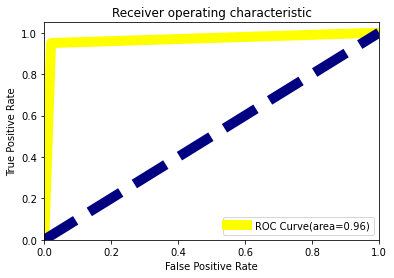

In [59]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresolds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,lw=10,color='yellow',label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## Model Saving

In [60]:
import pickle
filename='rainFall_prediction.pkl'
pickle.dump(rc,open(filename,'wb'))

## Conclusion

In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rc.predict(X_test))
data_con=pd.DataFrame({'Original':a,'predicted':predicted})
data_con

,Original,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
2432,0.0,0.0
2433,1.0,1.0
2434,0.0,0.0
2435,1.0,1.0
